In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


- Pregnancies : 임신 횟수
- Glucose : 포도당 부하 검사 수치
- BloodPressure : 혈압(mmHg)
- SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin : 혈청 인슐린(mu U/ml)
- BMI : 체질량지수[체중(kg) / 키(m)^2]
- DiabetesPedigreeFunction : 당뇨 내력 가중치 값
- Age : 나이
- Outcome : 클래스 결정값(0 또는 1)

In [3]:
diabetes_data.info() # Null값 존재하지 X 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [28]:
def get_clf_eval(y_test, pred = None, pred_proba = None) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬\n', confusion)
    print('정확도 : {0:4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [29]:
def precision_recall_curve_plot(y_test = None, pred_proba_c1 = None) :
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize = (10,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], linestyle = '-', label = 'recall')
    
    # threshold값 x축의 scale을 0,1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, gird 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    

**Logistic Regression으로 학습 및 예측 수행**

In [30]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify = y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
 [[89 11]
 [20 34]]
정확도 : 0.798701, 정밀도 : 0.7556, 재현율 : 0.6296, F1 : 0.6869, AUC : 0.8404


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**precision recall plot**

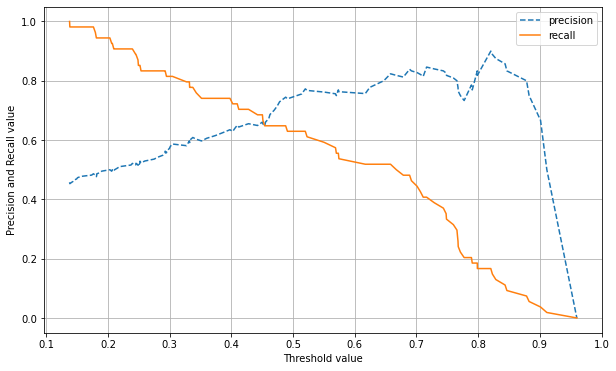

In [31]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

임계값을 조절하기 전에 데이터 값을 점검(`describe()` 메서드를 호출해 피처 값의 분포 확인)

**각 피처들의 4분위 분포 확인**

In [32]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Glucose, BloodPressure, SkinThickness, Insulin, BMI 등의 피처에서 0값을 가지는 sample이 있음을 확인(불가능한 수치)

**Glucose 피처의 분포도**

(array([  4.,  19.,  87., 149., 166., 125.,  88.,  54.,  44.,  32.]),
 array([ 44. ,  59.5,  75. ,  90.5, 106. , 121.5, 137. , 152.5, 168. ,
        183.5, 199. ]),
 <BarContainer object of 10 artists>)

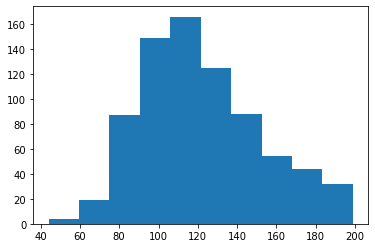

In [33]:
plt.hist(diabetes_data['Glucose'], bins = 10)

**0값이 있는 피처들에서 0값의 데이터 건수와 퍼센트 계산**

In [34]:
# 0값을 계산할 피처명 리스트 객체 설정
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복하면서 데이터값이 0인 데이터 건수 추출하고 퍼센트 계산
for feature in zero_features :
    zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 0, 퍼센트는 0.00%
BloodPressure 0 건수는 0, 퍼센트는 0.00%
SkinThickness 0 건수는 0, 퍼센트는 0.00%
Insulin 0 건수는 0, 퍼센트는 0.00%
BMI 0 건수는 0, 퍼센트는 0.00%


**0값을 평균값으로 대체**

In [35]:
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, diabetes_data[zero_features].mean())

**StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용하고 0값을 평균으로 대체한 데이터 세트로 학습 및 예측**

In [36]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify = y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
 [[90 10]
 [21 33]]
정확도 : 0.798701, 정밀도 : 0.7674, 재현율 : 0.6111, F1 : 0.6804, AUC : 0.8433


**분류결정 임계값을 변경하면서 성능 측정**

In [37]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds) : 
    for custom_threshold in thresholds : 
        custom_predict = Binarizer(threshold = custom_threshold).fit_transform(pred_proba_c1)
        print('임계값 :', custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)        

In [38]:
thresholds = [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값 : 0.3
오차 행렬
 [[67 33]
 [11 43]]
정확도 : 0.714286, 정밀도 : 0.5658, 재현율 : 0.7963, F1 : 0.6615, AUC : 0.8433
임계값 : 0.33
오차 행렬
 [[72 28]
 [12 42]]
정확도 : 0.740260, 정밀도 : 0.6000, 재현율 : 0.7778, F1 : 0.6774, AUC : 0.8433
임계값 : 0.36
오차 행렬
 [[76 24]
 [15 39]]
정확도 : 0.746753, 정밀도 : 0.6190, 재현율 : 0.7222, F1 : 0.6667, AUC : 0.8433
임계값 : 0.39
오차 행렬
 [[78 22]
 [16 38]]
정확도 : 0.753247, 정밀도 : 0.6333, 재현율 : 0.7037, F1 : 0.6667, AUC : 0.8433
임계값 : 0.42
오차 행렬
 [[84 16]
 [18 36]]
정확도 : 0.779221, 정밀도 : 0.6923, 재현율 : 0.6667, F1 : 0.6792, AUC : 0.8433
임계값 : 0.45
오차 행렬
 [[85 15]
 [18 36]]
정확도 : 0.785714, 정밀도 : 0.7059, 재현율 : 0.6667, F1 : 0.6857, AUC : 0.8433
임계값 : 0.48
오차 행렬
 [[88 12]
 [19 35]]
정확도 : 0.798701, 정밀도 : 0.7447, 재현율 : 0.6481, F1 : 0.6931, AUC : 0.8433
임계값 : 0.5
오차 행렬
 [[90 10]
 [21 33]]
정확도 : 0.798701, 정밀도 : 0.7674, 재현율 : 0.6111, F1 : 0.6804, AUC : 0.8433


**임계값을 0.48로 설정한 Binarizer 생성**

In [39]:
pred_048 = Binarizer(threshold = 0.48).fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test, pred_048, pred_proba[:,1])

오차 행렬
 [[88 12]
 [19 35]]
정확도 : 0.798701, 정밀도 : 0.7447, 재현율 : 0.6481, F1 : 0.6931, AUC : 0.8433
